In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [4]:
df = pd.read_csv("zomato.csv",encoding='latin-1')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

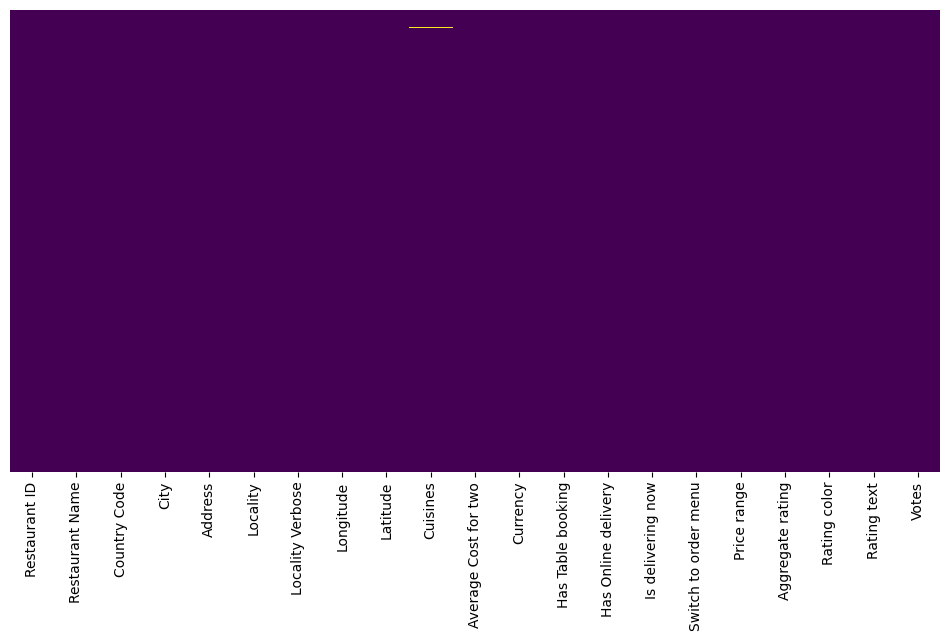

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df_country = pd.read_excel("Country-Code.xlsx")

In [9]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
final_df= pd.merge(df,df_country,on='Country Code',how='left')

In [11]:
country_names = final_df.Country.value_counts().index

In [12]:
country_val=final_df.Country.value_counts().values

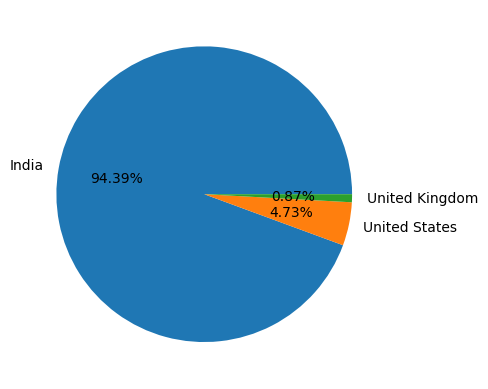

In [13]:
#Top 3 Countries
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.show()

Observation: Zomato maximum records are from INDIA after that USA then UK.

In [18]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

Obervation:-
When rating is between 4.5 to 4.9 ---> Excellent
When rating is between 4.0 to 3.4 --->Very Good
When rating is between 3.5 to 3.9 ---> Good
When rating is between 3.0 to 3.4 ---> Average


In [19]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

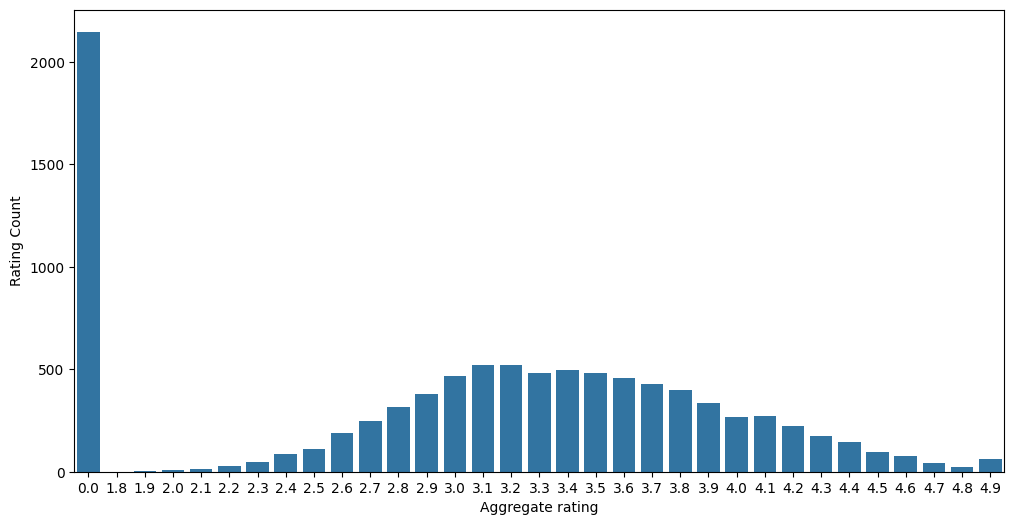

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y ='Rating Count',data=ratings)


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

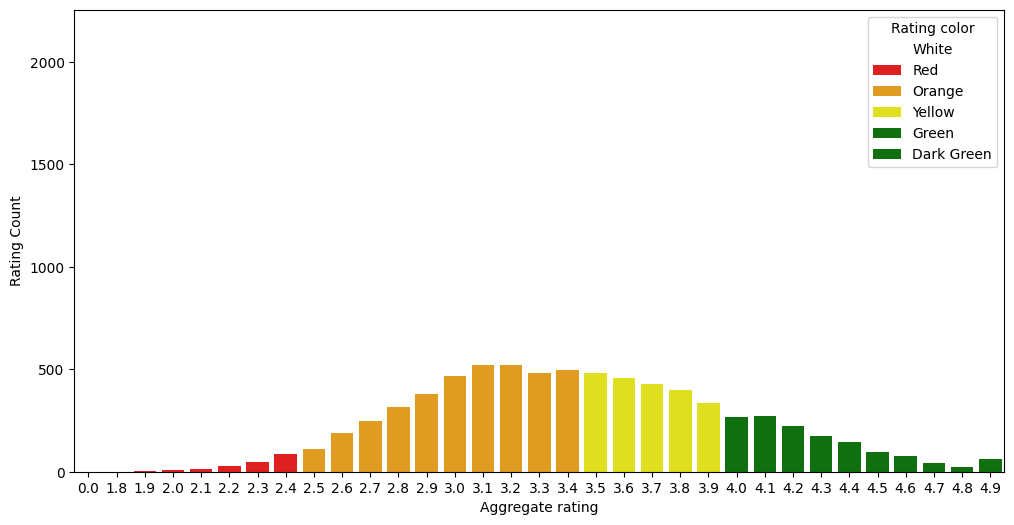

In [25]:
sns.barplot(x='Aggregate rating',y ='Rating Count',hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])

Obervation--> Not rated count is very high
Maximum number of rating are between 2.5 to 3.4

In [26]:
#Find the countries with 0 rating
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Observation:- Maximum number of 0 ratings are from Indian customers

In [28]:
# find which currency is used by which countries
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [29]:
#Which countries has online deliveries
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

,count
Country,
India,2423
UAE,28


Observation-- Online delivery is only available in INDIA AND UAE

In [31]:
#Create a pie chart for cities distribution
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Lucknow', 'Ahmedabad', 'Amritsar', 'Guwahati',
       ...
       'Forrest', 'East Ballina', 'Huskisson', 'Inverloch', 'Lakeview',
       'Lakes Entrance', 'Mohali', 'Panchkula', 'Bandung', 'Randburg'],
      dtype='object', name='City', length=141)

In [37]:
city_values =final_df.City.value_counts().values
city_labels =final_df.City.value_counts().index

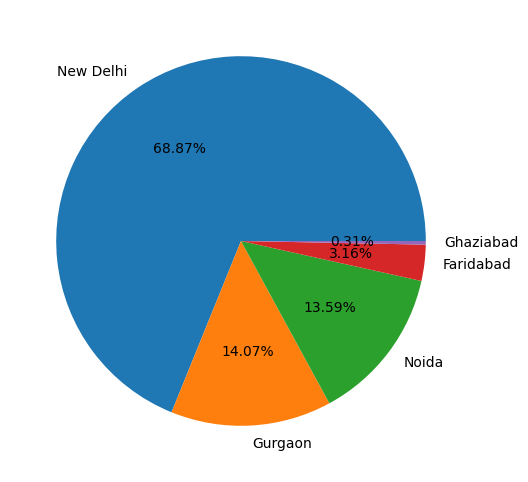

In [39]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

In [45]:
# top 10 cuisines
Top_cuisines = final_df.Cuisines.value_counts()
Top_cuisines[0:10]

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170
